n = 100 | avg runtime = 2062.50 ns | median runtime = 1965.50 ns
n = 200 | avg runtime = 1864.00 ns | median runtime = 1460.00 ns
n = 500 | avg runtime = 2097.20 ns | median runtime = 1976.50 ns
n = 1000 | avg runtime = 2338.20 ns | median runtime = 2250.50 ns
n = 2000 | avg runtime = 4111.00 ns | median runtime = 2908.50 ns
n = 5000 | avg runtime = 3999.80 ns | median runtime = 3477.00 ns
n = 10000 | avg runtime = 5761.60 ns | median runtime = 4963.00 ns
n = 20000 | avg runtime = 9036.70 ns | median runtime = 9000.00 ns
n = 50000 | avg runtime = 15038.70 ns | median runtime = 14935.50 ns
n = 100000 | avg runtime = 18939.10 ns | median runtime = 18075.00 ns
n = 200000 | avg runtime = 25351.50 ns | median runtime = 23997.00 ns
n = 500000 | avg runtime = 31795.90 ns | median runtime = 31894.50 ns
n = 1000000 | avg runtime = 36067.50 ns | median runtime = 35664.00 ns
n = 2000000 | avg runtime = 38162.80 ns | median runtime = 37397.50 ns
n = 5000000 | avg runtime = 45691.60 ns | median run

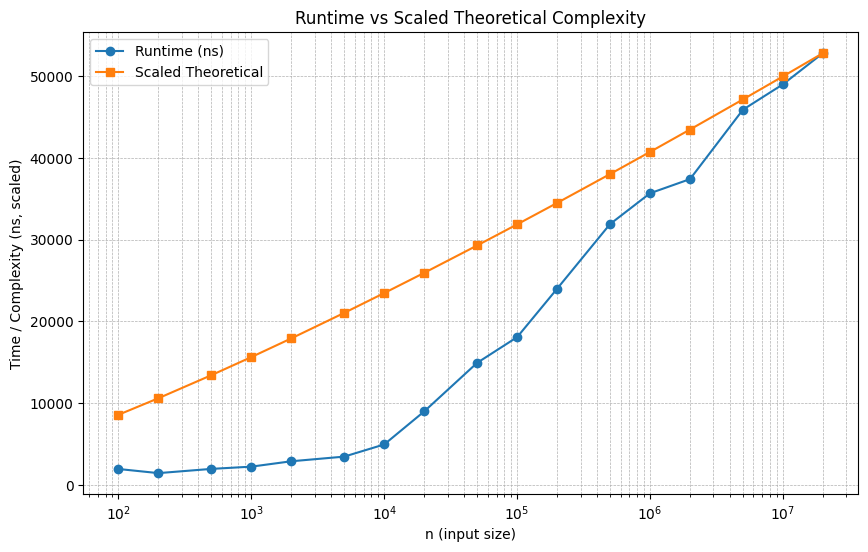

In [15]:
import time
import statistics
import matplotlib.pyplot as plt
import numpy as np

#One run for given n
def run_case(n: int) -> int:
    #Initializing two lists a and b
    a = list(range(n))
    b = [n - i for i in range(n)]

    Sum = 0
    start = time.perf_counter_ns()  #nanosecond precision : Clock to measure the time required by our code snippet

    #Given Code Snippet
    j = 2
    while j < n:
        k = j
        while k < n:
            Sum += a[j] * b[k]
            k = k * k
        j = 2 * j

    end = time.perf_counter_ns()
    duration = end - start #time is calculated here
    return duration


def main():
    test_n = [
        100, 200, 500,
        1000, 2000, 5000,
        10000, 20000, 50000,
        100000, 200000, 500000,
        1000000, 2000000, 5000000,
        10000000, 20000000
    ]

    R = 10  #repetitions per n -we want to be free of random fluctuations in runtime values so we run the program 10 times for the same value of n and calculate the average and median runtime values

    avg_times = []
    median_times = []

    #Now, for every n in the input lets find the values of median and average runtime
    for n in test_n:
        times = [run_case(n) for _ in range(R)]
        avg = statistics.mean(times)  #average runtime
        median = statistics.median(times) #median runtime
        avg_times.append(avg)
        median_times.append(median)
        print(f"n = {n} | avg runtime = {avg:.2f} ns | median runtime = {median:.2f} ns")

    #Calculating using Time Complexity Theoretical: O(log2(n) * log2(log2(n)))
    scaled_theoretical = [
        np.log2(n) * np.log2(np.log2(n)) for n in test_n
    ]

    #Calculating the scaling constant by dividing the max from median times to max of the theoretical values we got
    scale_factor = max(median_times) / max(scaled_theoretical)
    scaled_theoretical = [x * scale_factor for x in scaled_theoretical] #Multiplying all the values of log2(n) * log2(log2(n)) to the scaling constant

    #Plotting the graoh using the values obtained
    plt.figure(figsize=(10, 6))
    plt.plot(test_n, median_times, "o-", label="Runtime (ns)")
    plt.plot(test_n, scaled_theoretical, "s-", label="Scaled Theoretical")

    plt.xscale("log")
    plt.xlabel("n (input size)")
    plt.ylabel("Time / Complexity (ns, scaled)")
    plt.title("Runtime vs Scaled Theoretical Complexity")
    plt.legend()
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()

if __name__ == "__main__":
    main()


In [16]:
test_n = [
        100, 200, 500,
        1000, 2000, 5000,
        10000, 20000, 50000,
        100000, 200000, 500000,
        1000000, 2000000, 5000000,
        10000000, 20000000
]

scaled_theoretical = [
        np.log2(n) * np.log2(np.log2(n) + 1e-9) for n in test_n
]


In [17]:
scaled_theoretical

[np.float64(18.151153607372276),
 np.float64(22.429372080199382),
 np.float64(28.371594871727634),
 np.float64(33.0563405071406),
 np.float64(37.88609488788906),
 np.float64(44.471006026966045),
 np.float64(49.590019592851306),
 np.float64(54.81770950001206),
 np.float64(61.88231866770954),
 np.float64(67.33463440540294),
 np.float64(72.87386158951638),
 np.float64(80.32138331576294),
 np.float64(86.04424958216268),
 np.float64(91.83952865961771),
 np.float64(99.60576399384009),
 np.float64(105.55635927330901),
 np.float64(111.56901575888995)]